# Data Crunch

Items worked on in chunks

In [129]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

In [130]:
def config():
    with open('settings/config.yml') as config_fp:
        config = yaml.safe_load(config_fp)
    return config

Chose item

In [131]:
conf = config()

def date_parse(indate):
    return datetime.datetime.strptime(indate, "%d/%m/%Y")

def datafetch():
    try:
        items = {str(k):i for k, i in enumerate(list(conf['spaced']))}
        for key, item in items.items():
            print(f"{key}: {item}", end=", ")
    except TypeError:
        print("Error: You have no data in the config file")
        return
    if len(items.keys()) == 1:
        cur = '0'
    else:
        print()
        while True:
            cur = input('')
            if cur in items.keys():
                break
            print(f"Please try again, {cur} isn't a valid option")
    data = conf['spaced'][items[cur]]
    print(f"goal: {data['goal']}")
    if data['book']:
        print(f"Working from {data['book']} by {', '.join(data['authors'])}")
    df = pd.read_csv(f"data/{data['data']}", sep='|', date_parser=date_parse, parse_dates=['date'], index_col=['date'])
    print()
    return items[cur], df
    
    
item, df = datafetch()
df.head()

0: precalculus, goal: Complete the precalculus textbook by my next birthday
Working from Precalculus, Mathematics for Calculus by Stewart, Redlin, Watson



,achieved,target
date,,
2021-12-22,44,49
2021-12-23,44,54
2021-12-24,44,59
2021-12-25,44,64
2021-12-26,44,69


## See Progress

Plot where I'm at

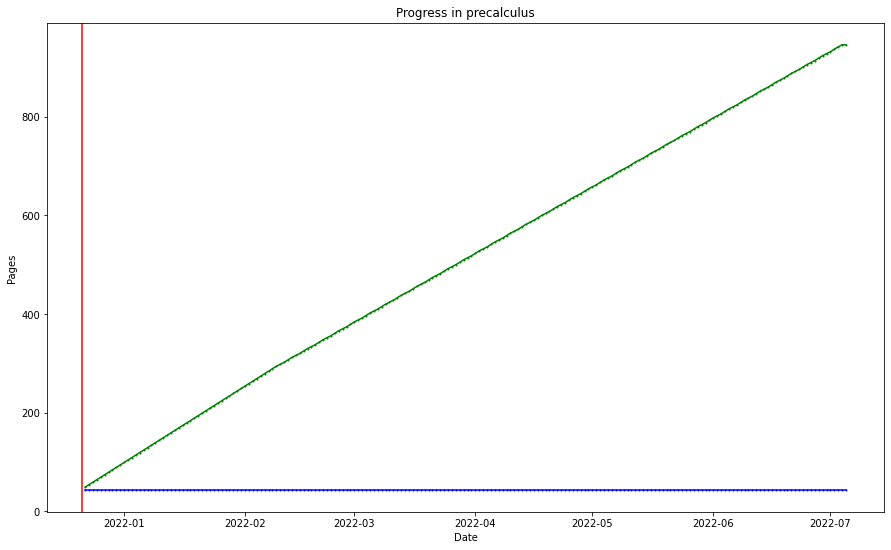

In [141]:
# Plot where I'm at
df.resample("D").sum()
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,9))
_ = ax.set_title(f"Progress in {item}")
_ = ax.plot(df['achieved'], marker='o', markersize=1, color='b')
_ = ax.plot(df['target'], marker='o', markersize=1, color='g')
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Pages')
_ = ax.axvline(datetime.datetime.now(), color='r')
plt.show()

## Add today's score

In [ ]:
today_page = input('')
# TODO: add this into the data.  Make sur